# Volumes and Layers

<img src="../Detector.png" alt="Detector layout" width="800"/>

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from trackml.dataset import load_event
import seaborn as sns
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

In [2]:
path2data = '/home/alepfu/Desktop/dataset/train_100_events/'
event_id = 'event000001000'
hits, cells, particles, truth = load_event(path2data + event_id)
data = pd.merge(pd.merge(truth, pd.DataFrame(hits), on = ['hit_id']), pd.DataFrame(particles), on = ['particle_id']).loc[:,['hit_id', 'particle_id', 'x', 'y', 'z','volume_id','layer_id']]
data['r'] = data.apply(lambda h: np.sqrt(h['x']**2 + h['y']**2), axis=1)

data.head(1)

,hit_id,particle_id,x,y,z,volume_id,layer_id,r
0,2,22525763437723648,-55.336102,0.635342,-1502.5,7,2,55.339749


In [3]:
print('Volumes:', np.sort(data['volume_id'].unique()))

Volumes: [ 7  8  9 12 13 14 16 17 18]


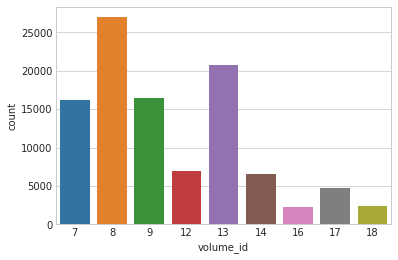

In [4]:
sns.countplot(x='volume_id', data=data);

In [5]:
for v in np.sort(data['volume_id'].unique()):
    print('Layers for volume ' + str(v) + ':', np.sort(data[data['volume_id'] == v]['layer_id'].unique()))

Layers for volume 7: [ 2  4  6  8 10 12 14]
Layers for volume 8: [2 4 6 8]
Layers for volume 9: [ 2  4  6  8 10 12 14]
Layers for volume 12: [ 2  4  6  8 10 12]
Layers for volume 13: [2 4 6 8]
Layers for volume 14: [ 2  4  6  8 10 12]
Layers for volume 16: [ 2  4  6  8 10 12]
Layers for volume 17: [2 4]
Layers for volume 18: [ 2  4  6  8 10 12]


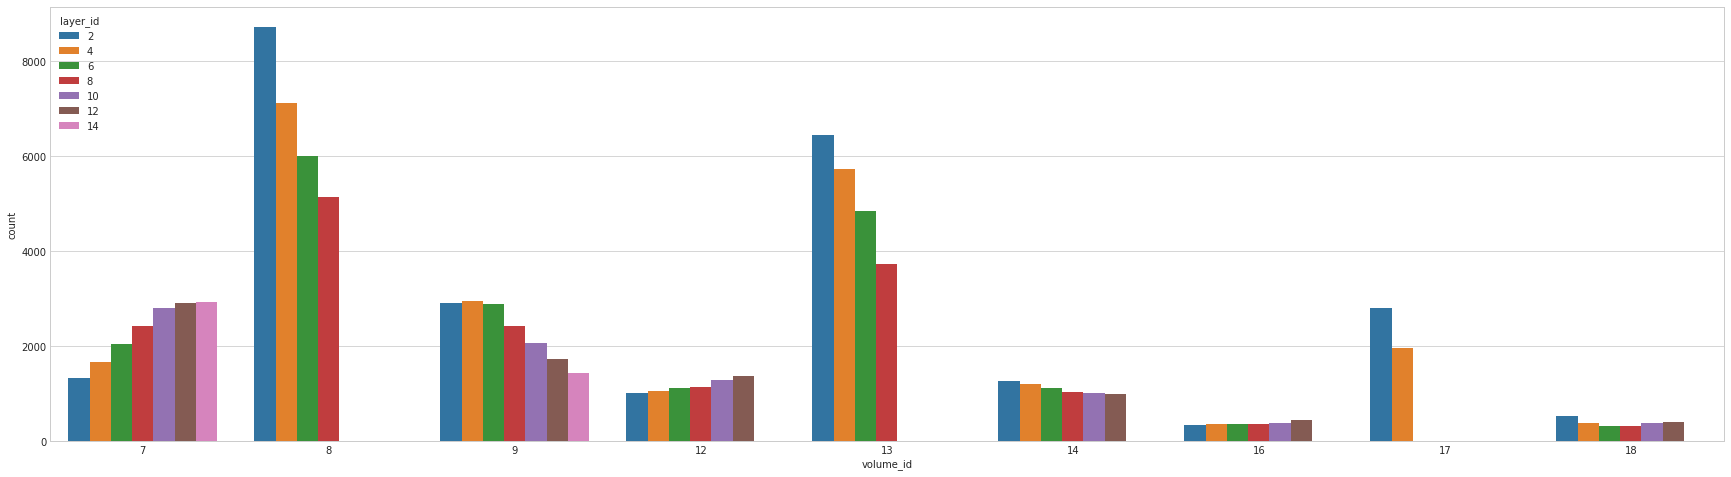

In [6]:
plt.figure(figsize=(30,8))
sns.countplot(x="volume_id", hue="layer_id", data=data);

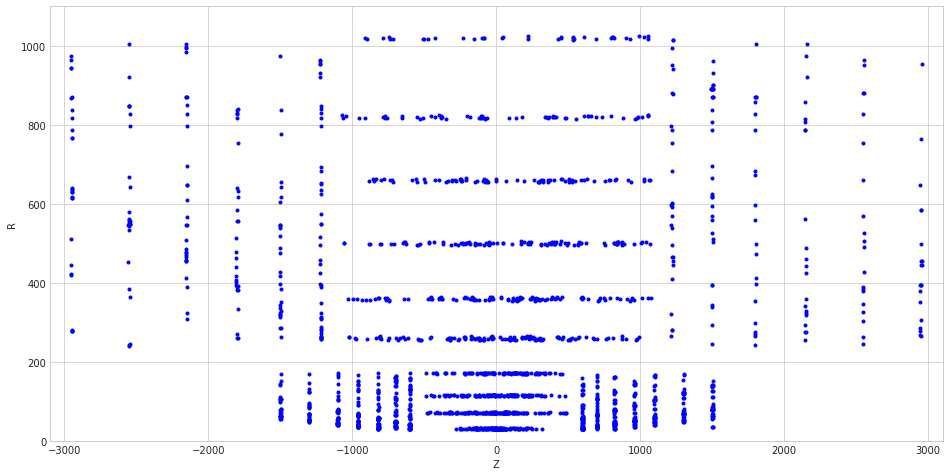

In [7]:
particle_ids = pd.DataFrame(data['particle_id'].unique())
sample_particle_ids = particle_ids.sample(200).values

plt.figure(figsize=(16,8))

for p in sample_particle_ids:
    t = data[data['particle_id'] == p[0]]
    plt.plot(t['z'], t['r'], '.', color='b')

plt.xlim((-3100,3100))
plt.ylim((0,1100))
plt.xlabel("Z")
plt.ylabel("R")
plt.show()

### Volume Sequences

# TODO see code!

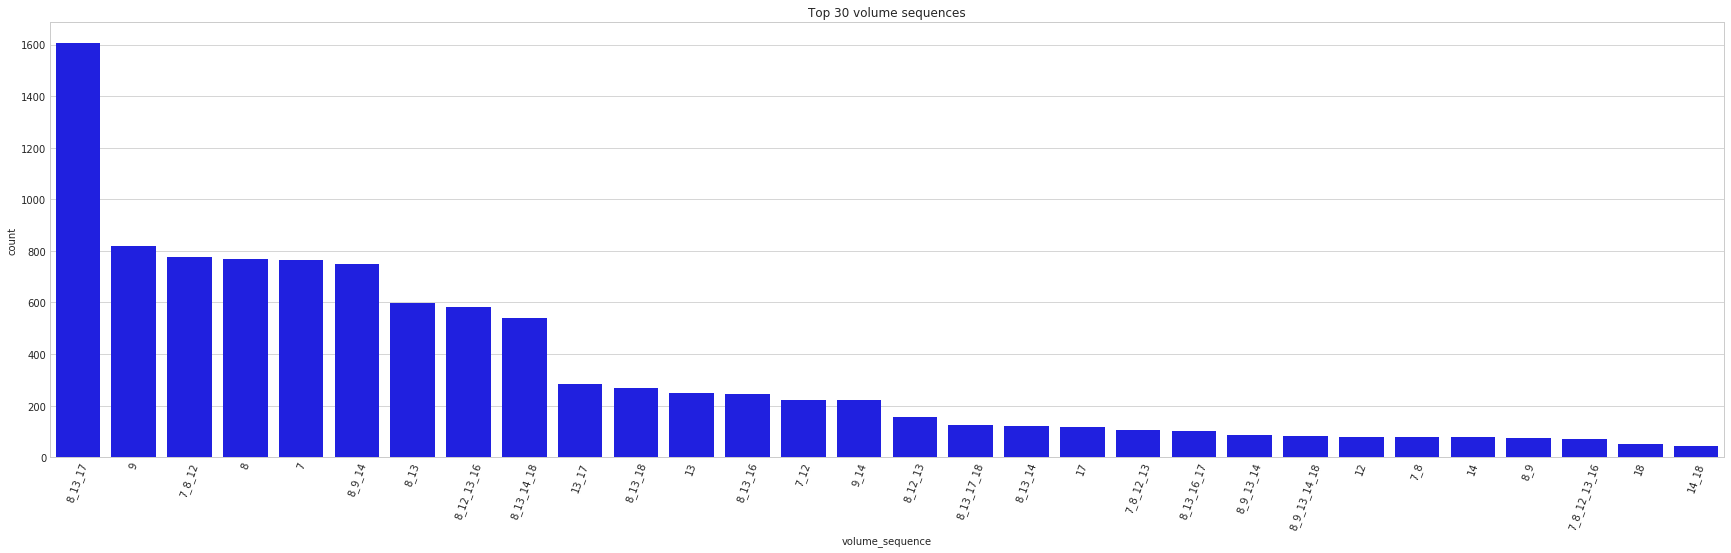

In [9]:
particle_ids = pd.DataFrame(data['particle_id'].unique())

seqs = []

for p in particle_ids.values:
    t = data[data['particle_id'] == p[0]]
    
    # TODO generate sequence strings in a way that they mach the possible trajcetory through the detector
    #        e.g. 8_7_12 instead of 7_8_12
    
    seq = map(str, np.sort(t['volume_id'].unique()))
    seqs.append("_".join(seq))

seqs_df = pd.DataFrame(seqs)
seqs_df.rename(columns={0: 'volume_sequence'}, inplace=True)

plt.figure(figsize=(30,8))

N_top = 30
ax = sns.countplot(x='volume_sequence', data=seqs_df, order = seqs_df['volume_sequence'].value_counts().iloc[:N_top].index, color='b');
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);
ax.set_title('Top %d volume sequences' % N_top);